In [1]:
# Importación de librerias
import pandas as pd
import regex as re

C:\Users\PC\AppData\Local\Temp\ipykernel_18988\3333142294.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_excel(r"H:\Mi unidad\a20151428@pucp.edu.pe 2023-10-29 03 16\2. Académic\19. Winter camp\sdc_outcomes_clasificado.xlsx")
df

,Número de Resolución,Fecha de Resolución,Expediente,Partes,Sumilla,Resolución Impugnada,Cláusula General,Engaño,Confusión,Reputación Ajena,Denigración,Equiparación Indebida,Secretos Empresariales,Violación de Normas,Sabotaje Empresarial,Autenticidad,Legalidad,Adecuación Social,Procedimental,Enlace
0,1-2019-SDC,08/01/2019,269-2017/CCD,CERRADURAS NACIONALES S.A.C GRUPO FORTE S.A.C.,Se declara la NULIDAD de la Resolución 5 del 1...,Comisión de Fiscalización de la Competencia De...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No confirma,http://servicio.indecopi.gob.pe/buscadorResolu...
1,10-2009-SC1,13/01/2009,4-2005/CCD,CAJA MUNICIPAL DE AHORRO Y CRÉDITO CUSCO S.A. ...,Se confirma la Resolución 098-2008/CCD del 9 d...,098-2008/CCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirma,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
2,10-2016-SDC,11/01/2016,1-2014/CCD-INDECOPI-SAM,PROCEDIMIENTO INICIADO DE OFICIO EMPRESA DE SE...,Se CONFIRMA la Resolución 093-2015/CCD-INDECOP...,093-2015/CCD-INDECOPI-SAM,NaN,Confirma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
3,10-2017-SDC,09/01/2017,16-2015/CCD-INDECOPI-CAJ,PROCEDIMIENTO INICIADO DE OFICIO ESTILOS COLLE...,Se CONFIRMA la Resolución 0191-2016/INDECOPI-C...,0191-2016/CCD-INDECOPI-CAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmación parcial,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
4,10-2018-SDC,15/01/2018,41-2017/CCD,PRODUCCIÓN Y MANTENIMIENTO DEL PERÚ S.A.C. INV...,Se CONFIRMA la Resolución s/n del 19 de abril ...,Secretaría Técnica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirma,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,99-2015-SC1,17/02/2015,172-2013/CCD,PROCEDIMIENTO INICIADO DE OFICIO E. WONG S.A.,SE CONFIRMA LA RESOLUCIÓN 136-2014/CCD-INDECOP...,136-2014/CCD-INDECOPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmación parcial,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
1266,99-2018-SDC,10/05/2018,5-2016/CCD-INDECOPI-CAJ,PROCEDIMIENTO INICIADO DE OFICIO WYF S.A.C.,Se CONFIRMA el extremo de la Resolución 0230-2...,0230-2017/INDECOP I-CAJ,NaN,Confirma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
1267,99-2019-SDC,14/05/2019,16-2018/CCD,ATRÁPALO PERÚ S.A.C. TELEDISTRIBUCIÓN S.A.,Se CONFIRMA la Resolución 0176-2018/CCD-INDECO...,0176-2018/CCD-INDECOPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirma,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
1268,99-2020-SDC,27/08/2020,204-2018/CCD,ASOCIACIÓN INTERNACIONAL DE CONSUMIDORES Y USU...,Se REVOCA la Resolución la Resolución 176-2019...,176-2019/CCD-INDECOPI,NaN,No confirma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...


In [ ]:
import matplotlib.pyplot as plt

In [3]:
categorical_values=['Cláusula General','Engaño', 'Confusión', 'Reputación Ajena', 'Denigración', 
                    'Equiparación Indebida','Violación de Normas','Secretos Empresariales','Sabotaje Empresarial', 
                    'Autenticidad', 'Legalidad', 'Adecuación Social', 'Procedimental']

In [4]:
# Initialize the new columns
df['Confirma'] = 0
df['Confirmación parcial'] = 0
df['No confirma'] = 0

# Iterate over each row and count the occurrences of each keyword
for index, row in df.iterrows():
    df.at[index, 'Confirma'] = sum(row[col] == 'Confirma' for col in categorical_values if col in df.columns)
    df.at[index, 'Confirmación parcial'] = sum(row[col] == 'Confirmación parcial' for col in categorical_values if col in df.columns)
    df.at[index, 'No confirma'] = sum(row[col] == 'No confirma' for col in categorical_values if col in df.columns)

df


,Número de Resolución,Fecha de Resolución,Expediente,Partes,Sumilla,Resolución Impugnada,Cláusula General,Engaño,Confusión,Reputación Ajena,...,Violación de Normas,Sabotaje Empresarial,Autenticidad,Legalidad,Adecuación Social,Procedimental,Enlace,Confirma,Confirmación parcial,No confirma
0,1-2019-SDC,08/01/2019,269-2017/CCD,CERRADURAS NACIONALES S.A.C GRUPO FORTE S.A.C.,Se declara la NULIDAD de la Resolución 5 del 1...,Comisión de Fiscalización de la Competencia De...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No confirma,http://servicio.indecopi.gob.pe/buscadorResolu...,0,0,1
1,10-2009-SC1,13/01/2009,4-2005/CCD,CAJA MUNICIPAL DE AHORRO Y CRÉDITO CUSCO S.A. ...,Se confirma la Resolución 098-2008/CCD del 9 d...,098-2008/CCD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Confirma,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
2,10-2016-SDC,11/01/2016,1-2014/CCD-INDECOPI-SAM,PROCEDIMIENTO INICIADO DE OFICIO EMPRESA DE SE...,Se CONFIRMA la Resolución 093-2015/CCD-INDECOP...,093-2015/CCD-INDECOPI-SAM,NaN,Confirma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
3,10-2017-SDC,09/01/2017,16-2015/CCD-INDECOPI-CAJ,PROCEDIMIENTO INICIADO DE OFICIO ESTILOS COLLE...,Se CONFIRMA la Resolución 0191-2016/INDECOPI-C...,0191-2016/CCD-INDECOPI-CAJ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Confirmación parcial,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,0,1,0
4,10-2018-SDC,15/01/2018,41-2017/CCD,PRODUCCIÓN Y MANTENIMIENTO DEL PERÚ S.A.C. INV...,Se CONFIRMA la Resolución s/n del 19 de abril ...,Secretaría Técnica,NaN,NaN,NaN,NaN,...,Confirma,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,99-2015-SC1,17/02/2015,172-2013/CCD,PROCEDIMIENTO INICIADO DE OFICIO E. WONG S.A.,SE CONFIRMA LA RESOLUCIÓN 136-2014/CCD-INDECOP...,136-2014/CCD-INDECOPI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Confirmación parcial,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,0,1,0
1266,99-2018-SDC,10/05/2018,5-2016/CCD-INDECOPI-CAJ,PROCEDIMIENTO INICIADO DE OFICIO WYF S.A.C.,Se CONFIRMA el extremo de la Resolución 0230-2...,0230-2017/INDECOP I-CAJ,NaN,Confirma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
1267,99-2019-SDC,14/05/2019,16-2018/CCD,ATRÁPALO PERÚ S.A.C. TELEDISTRIBUCIÓN S.A.,Se CONFIRMA la Resolución 0176-2018/CCD-INDECO...,0176-2018/CCD-INDECOPI,NaN,NaN,NaN,NaN,...,NaN,Confirma,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
1268,99-2020-SDC,27/08/2020,204-2018/CCD,ASOCIACIÓN INTERNACIONAL DE CONSUMIDORES Y USU...,Se REVOCA la Resolución la Resolución 176-2019...,176-2019/CCD-INDECOPI,NaN,No confirma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,0,0,1


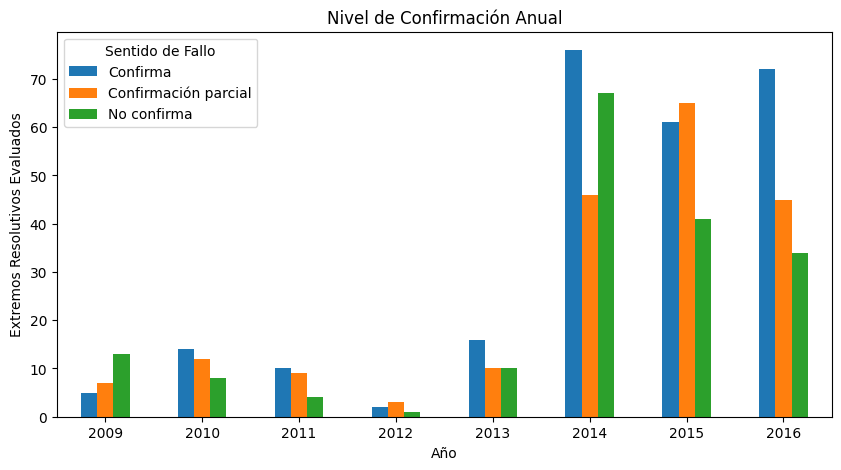

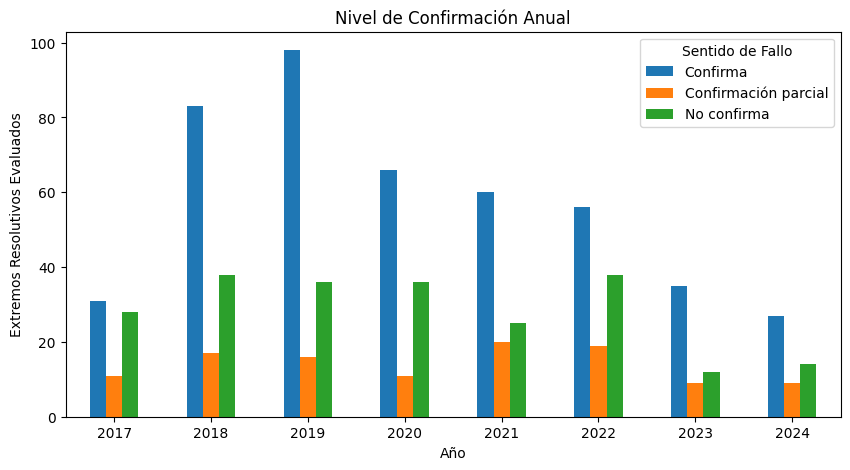

In [8]:
import matplotlib.pyplot as plt
df['Fecha de Resolución'] = pd.to_datetime(df['Fecha de Resolución'], format='%d/%m/%Y')
df['Year'] = df['Fecha de Resolución'].dt.year

grouped_df = df.groupby('Year')[['Confirma', 'Confirmación parcial', 'No confirma']].sum()

group_2009_2016 = grouped_df.loc[2009:2016]
group_2017_2024 = grouped_df.loc[2017:2024]


# Plotting the histogram
plt.figure(figsize=(10, 5))
group_2009_2016.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Nivel de Confirmación Anual')
plt.xlabel('Año')
plt.ylabel('Extremos Resolutivos Evaluados')
plt.xticks(rotation=0)
plt.legend(title='Sentido de Fallo')
plt.show()


plt.figure(figsize=(10, 5))
group_2017_2024.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Nivel de Confirmación Anual')
plt.xlabel('Año')
plt.ylabel('Extremos Resolutivos Evaluados')
plt.xticks(rotation=0)
plt.legend(title='Sentido de Fallo')
plt.show()

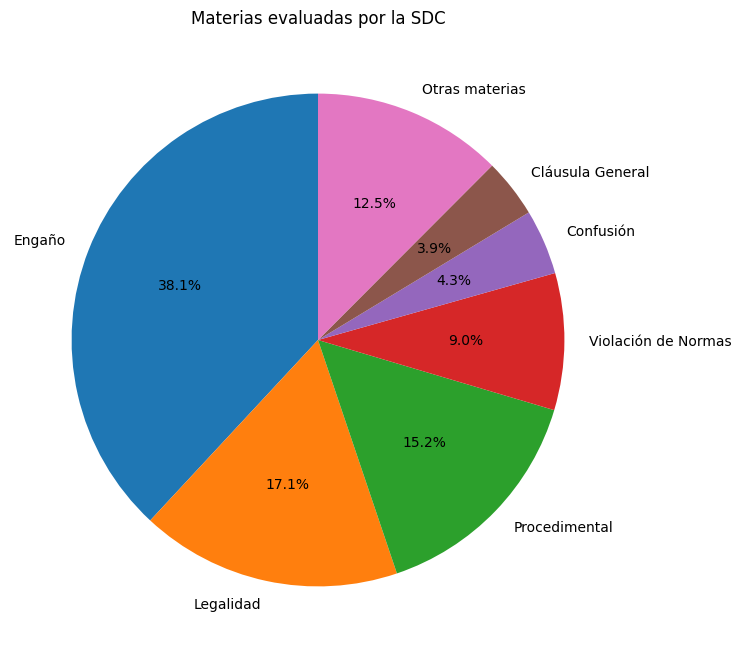

In [9]:
import matplotlib.pyplot as plt
observations = df[categorical_values].count()

# Calculate percentage and sort by descending order
percentage = (observations / observations.sum()).sort_values(ascending=False)

# Select the top 6 categories
top_6 = percentage.head(6)

# Sum the remaining categories and label as "Others"
others = pd.Series(percentage.iloc[6:].sum(), index=['Otras materias'])

# Combine the top 6 with "Others"
final_data = pd.concat([top_6, others])

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(final_data, labels=final_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Materias evaluadas por la SDC')
plt.show()